In [1]:
import numpy as np
import pandas as pd

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model

from sklearn.cross_validation import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import math


Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
np.random.seed(7)

msft_dataset = pd.read_csv('./data/UBS.csv')
msft_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-18,13.13,13.23,13.05,13.22,12.251142,2510500
1,2016-07-19,13.04,13.15,13.01,13.03,12.075066,1619900
2,2016-07-20,13.24,13.31,13.15,13.29,12.316010,1732200
3,2016-07-21,13.33,13.41,13.17,13.21,12.241874,1980100
4,2016-07-22,13.39,13.40,13.28,13.29,12.316010,1465100


In [3]:
msft_dataset.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
msft_dataset['Date'] = pd.to_datetime(msft_dataset['Date'])
msft_dataset['Close'] = pd.to_numeric(msft_dataset['Close'], downcast='float')
msft_dataset.set_index('Date',inplace=True)

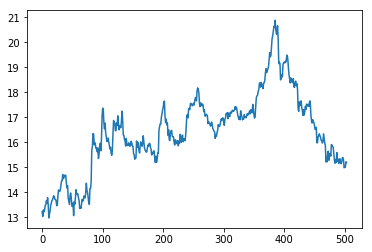

In [5]:
msft_close = msft_dataset['Close']
msft_close = msft_close.values.reshape(len(msft_close), 1)
plt.plot(msft_close)
plt.show()

In [6]:
print(msft_close.shape)
scaler = MinMaxScaler(feature_range=(0,1))
msft_close  = scaler.fit_transform(msft_close)
msftTrain , msftTest = msft_close[0:350], msft_close[350:]


(504, 1)


In [7]:
def create_ts(ds, series):
    X, Y =[], []
    for i in range(len(ds)-series - 1):
        item = ds[i:(i+series), 0]
        X.append(item)
        Y.append(ds[i+series, 0])
    return np.array(X), np.array(Y)

series = 7

trainX, trainY = create_ts(msftTrain, series=7)
testX, testY = create_ts(msftTest, series=7)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(4, input_shape=(series, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

model.fit(trainX, trainY, epochs=350, batch_size=32)

model.save('trained_model.h5')

print(trainX.shape)

Epoch 1/350
342/342 [==============================] - 1s 2ms/step - loss: 0.0956
Epoch 2/350
342/342 [==============================] - 0s 305us/step - loss: 0.0705
Epoch 3/350
342/342 [==============================] - 0s 302us/step - loss: 0.0496
Epoch 4/350
342/342 [==============================] - 0s 297us/step - loss: 0.0338
Epoch 5/350
342/342 [==============================] - 0s 310us/step - loss: 0.0230
Epoch 6/350
342/342 [==============================] - 0s 278us/step - loss: 0.0158
Epoch 7/350
342/342 [==============================] - 0s 278us/step - loss: 0.0117
Epoch 8/350
342/342 [==============================] - 0s 291us/step - loss: 0.0097
Epoch 9/350
342/342 [==============================] - 0s 327us/step - loss: 0.0087
Epoch 10/350
342/342 [==============================] - 0s 276us/step - loss: 0.0082
Epoch 11/350
342/342 [==============================] - 0s 281us/step - loss: 0.0078
Epoch 12/350
342/342 [==============================] - 0s 282us/step - loss

342/342 [==============================] - 0s 326us/step - loss: 0.0022
Epoch 98/350
342/342 [==============================] - 0s 309us/step - loss: 0.0022
Epoch 99/350
342/342 [==============================] - 0s 277us/step - loss: 0.0022
Epoch 100/350
342/342 [==============================] - 0s 409us/step - loss: 0.0022
Epoch 101/350
342/342 [==============================] - 0s 394us/step - loss: 0.0022
Epoch 102/350
342/342 [==============================] - 0s 269us/step - loss: 0.0022
Epoch 103/350
342/342 [==============================] - 0s 257us/step - loss: 0.0022
Epoch 104/350
342/342 [==============================] - 0s 272us/step - loss: 0.0022
Epoch 105/350
342/342 [==============================] - 0s 263us/step - loss: 0.0022
Epoch 106/350
342/342 [==============================] - 0s 280us/step - loss: 0.0022
Epoch 107/350
342/342 [==============================] - 0s 288us/step - loss: 0.0022
Epoch 108/350
342/342 [==============================] - 0s 365us/step

342/342 [==============================] - 0s 320us/step - loss: 0.0019
Epoch 193/350
342/342 [==============================] - 0s 378us/step - loss: 0.0019
Epoch 194/350
342/342 [==============================] - 0s 351us/step - loss: 0.0018
Epoch 195/350
342/342 [==============================] - 0s 347us/step - loss: 0.0018
Epoch 196/350
342/342 [==============================] - 0s 275us/step - loss: 0.0018
Epoch 197/350
342/342 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 198/350
342/342 [==============================] - 0s 335us/step - loss: 0.0018
Epoch 199/350
342/342 [==============================] - 0s 317us/step - loss: 0.0018
Epoch 200/350
342/342 [==============================] - 0s 364us/step - loss: 0.0018
Epoch 201/350
342/342 [==============================] - 0s 320us/step - loss: 0.0018
Epoch 202/350
342/342 [==============================] - 0s 316us/step - loss: 0.0018
Epoch 203/350
342/342 [==============================] - 0s 311us/st

342/342 [==============================] - 0s 334us/step - loss: 0.0015
Epoch 288/350
342/342 [==============================] - 0s 315us/step - loss: 0.0015
Epoch 289/350
342/342 [==============================] - 0s 315us/step - loss: 0.0015
Epoch 290/350
342/342 [==============================] - 0s 292us/step - loss: 0.0015
Epoch 291/350
342/342 [==============================] - 0s 315us/step - loss: 0.0015
Epoch 292/350
342/342 [==============================] - 0s 277us/step - loss: 0.0015
Epoch 293/350
342/342 [==============================] - 0s 288us/step - loss: 0.0014
Epoch 294/350
342/342 [==============================] - 0s 296us/step - loss: 0.0014
Epoch 295/350
342/342 [==============================] - 0s 304us/step - loss: 0.0014
Epoch 296/350
342/342 [==============================] - 0s 280us/step - loss: 0.0014
Epoch 297/350
342/342 [==============================] - 0s 327us/step - loss: 0.0014
Epoch 298/350
342/342 [==============================] - 0s 287us/st

Original Shape (342,)
Train score: %.2f rmse 0.2745458038307106
Test score: %.2f rmse 0.30305306956197914


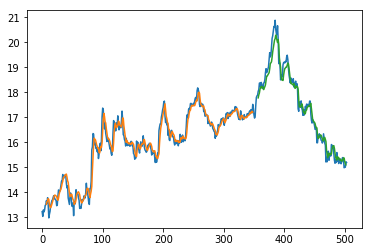

In [8]:
model = load_model('trained_model.h5')
trainPredictions = model.predict(trainX)
testPredictions = model.predict(testX)
#unscale predictions
trainPredictions = scaler.inverse_transform(trainPredictions)
testPredictions = scaler.inverse_transform(testPredictions)

#trainY = scaler.fit_transform(trainY)
#testY = scaler.fit_transform(testY)

print('Original Shape', trainY.shape)
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredictions[:, 0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredictions[:, 0]))
print('Train score: %.2f rmse', trainScore)
print('Test score: %.2f rmse', testScore)
'''
trainY, testY = trainY[0], testY[0]
trainY, testY = np.reshape(trainY, (292, 1)), np.reshape(testY, (196, 1))
trainY, testY = scaler.fit_transform(trainY), scaler.fit_transform(testY)
trainY, testY = np.reshape(trainY, (292, )), np.reshape(testY, (196, ))
'''
train_plot = np.empty_like(msft_close)
train_plot[:,:] = np.nan
train_plot[series:len(trainPredictions)+series, :] = trainPredictions

test_plot = np.empty_like(msft_close)
test_plot[:,:] = np.nan
test_plot[len(trainPredictions)+(series*2)+1:len(msft_close)-1, :] = testPredictions

plt.plot(scaler.inverse_transform(msft_close))
plt.plot(train_plot)
plt.plot(test_plot)

plt.show()